# MNIST

### Data Format: (number of examples, number of features)


### Model: 
* Input ---> 256 ---> 256 ---> 10


*  60,000 examples for training and 
*  10,000 examples for testing. 

*  X_train (60000, 784)
*  Y_train (60000,10)

*  X_test (10000, 784)
*  Y_test (10000,10)

### Results:

*  Accuracy %97.94 
*  Cost 0.0983

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the dataset

In [2]:
# Import MINST data
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


### Preprocessing

In [4]:
# Normalize X
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

#Flatten input
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])


# convert to one hot
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [5]:
print("Training Data:")
print(X_train.shape)
print(Y_train.shape)

print("Test Data:")
print(X_test.shape)
print(Y_test.shape)

Training Data:
(60000, 784)
(60000, 10)
Test Data:
(10000, 784)
(10000, 10)


### Model

In [6]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),  ## (784,) here
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10),
    keras.layers.Activation('softmax')
  ])

  #optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [7]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: print('')
        print('.', end='')

EPOCHS = 40

In [8]:
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size= 512,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..........
..........
..........
..........

### Results

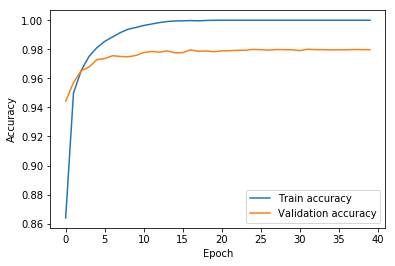

In [12]:
# Plot Accuracy
def plot_acc_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train accuracy')
    plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Validation accuracy')
    plt.legend()

plot_acc_history(history)

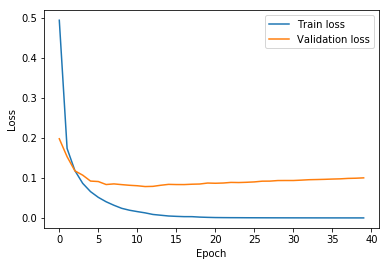

In [13]:
# Plot Loss
def plot_loss_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Validation loss')
    plt.legend()

plot_loss_history(history)

In [15]:
[loss, accuracy] = model.evaluate(X_test, Y_test, verbose=0)
print("Acc: % {:2f}".format(accuracy * 100))

Acc: % 98.020000


In [16]:
# alternatively
predictions = model.predict(X_test)
labels = np.argmax(predictions, axis = 1)

## Accuracy
acc = np.sum(np.equal(np.argmax(predictions, axis = 1), np.argmax(Y_test, axis = 1))) / Y_test.shape[0]
print("Acc: % {:2f}".format(acc * 100))

Acc: % 98.020000
